<a href="https://colab.research.google.com/github/disenodc/Doctorado_UNS/blob/main/TP_2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP 2 - clase 2 - Curva ROC


In [9]:
# importar librerias
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [14]:
# Generar un dataset de dos clases
A, B = make_classification(n_samples=1000, n_classes=2, random_state=1)

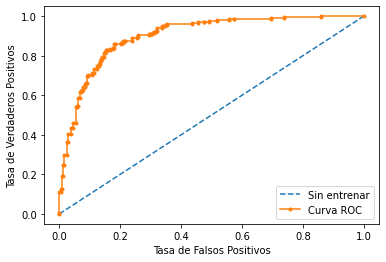

In [17]:
# Dividimos en training y test
trainX, testX, trainy, testy = train_test_split(A, B, test_size=0.5, random_state=2)
#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(testy))]
# Entrenamos nuestro modelo de reg log
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# Predecimos las probabilidades
lr_probs = model.predict_proba(testX)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]


# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# Pintamos las curvas ROC
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Curva ROC')
# Etiquetas de los ejes
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.show()